In [1]:
import numpy as np
from deepsy.core.model import Model
from deepsy.core.nn import NeuralNetwork
from deepsy.core.layer import Layer
from deepsy.core.functions.activation_functions import *
from deepsy.core.functions.loss_functions import *
from deepsy.core.functions.optimizers import *
import pandas as pd
from sklearn.model_selection import train_test_split

# Student_Performance.csv

### Data:

In [6]:
dataset = pd.read_csv('data/regression/Student_Performance.csv')
Y = dataset['Performance Index']
X = dataset.drop(columns=['Performance Index'])
X = pd.get_dummies(X, columns=['Extracurricular Activities'])

X = (X - X.mean()) / X.std()
Y = Y / 100

X, Y = X.values, Y.values

print('Dataset shape: {}'.format(dataset.shape))
print()
print('Dataset head:')
print(dataset.head())
print()
print('X first 5:')
print(X[:5])
print()
print('Y first 5:')
print(Y[:5])
print()

Dataset shape: (10000, 6)

Dataset head:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

X first 5:
[[ 0.77514895  1.70409044  1.45613179 -1.24969145 -1.01040412  1.01040412]
 [-0.38346141  0.72387648 -1.49221962 -0.9009371   0.98960404 -0.98

### Training:

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

nn = NeuralNetwork(layers=[
    Layer(nr_neurons=8, nr_in_features=6, activation_func=ReLU()),
    Layer(nr_neurons=12, nr_in_features=8, activation_func=ReLU(), dropout_rate=0.2),
    Layer(nr_neurons=1, nr_in_features=12, activation_func=ReLU())
])

model = Model(nn, loss_func=MSE(), optimizer=GradientDescent(0.2))
model.train(X_train.T, Y_train.T, nr_epochs=400, reg_lambda=0.2)

Epoch 1: cost = 0.14562034387732417
Epoch 2: cost = 0.14311547252369572
Epoch 3: cost = 0.14100577821106602
Epoch 4: cost = 0.13808731543323666
Epoch 5: cost = 0.134561845858372
Epoch 6: cost = 0.1296351572557661
Epoch 7: cost = 0.1262383734097549
Epoch 8: cost = 0.1250164201982646
Epoch 9: cost = 0.1210559026839441
Epoch 10: cost = 0.11863766617832333
Epoch 11: cost = 0.11460771764788684
Epoch 12: cost = 0.11406181751566628
Epoch 13: cost = 0.11000851896734105
Epoch 14: cost = 0.10886524451552729
Epoch 15: cost = 0.10517218929996892
Epoch 16: cost = 0.10332515889974225
Epoch 17: cost = 0.10104610917961775
Epoch 18: cost = 0.09960975243251012
Epoch 19: cost = 0.09601783588790454
Epoch 20: cost = 0.09329981096748043
Epoch 21: cost = 0.09090486176789964
Epoch 22: cost = 0.08938723873121099
Epoch 23: cost = 0.08661024640931618
Epoch 24: cost = 0.08656911881805998
Epoch 25: cost = 0.08335891462708436
Epoch 26: cost = 0.08024459221482964
Epoch 27: cost = 0.07690326728594475
Epoch 28: cost =

### Testing:

In [8]:
Y_predicted, cost = model.validate(X_test.T, Y_test.T)
print('Cost: {}'.format(cost))

for i in range(len(Y_predicted[0])):
    print('predicted: {}   actual: {}'.format(Y_predicted[0][i], Y_test[i]))

Cost: 0.0037262398826864943
predicted: 0.4191259473851403   actual: 0.27
predicted: 0.8487137964845513   actual: 0.9
predicted: 0.5866495898620441   actual: 0.68
predicted: 0.739353494499936   actual: 0.73
predicted: 0.7750208089326474   actual: 0.96
predicted: 0.46443810560372495   actual: 0.48
predicted: 0.5599057016901278   actual: 0.54
predicted: 0.7198151996439284   actual: 0.78
predicted: 0.31032999072477074   actual: 0.22
predicted: 0.4474684628761785   actual: 0.46
predicted: 0.4002295851804244   actual: 0.37
predicted: 0.6956454645623803   actual: 0.87
predicted: 0.346078248180525   actual: 0.27
predicted: 0.7482824598989755   actual: 0.79
predicted: 0.5190869474553645   actual: 0.56
predicted: 0.5066052304020512   actual: 0.57
predicted: 0.5956873133516853   actual: 0.53
predicted: 0.6480191518017637   actual: 0.74
predicted: 0.32623421697192667   actual: 0.25
predicted: 0.6851693435733431   actual: 0.82
predicted: 0.685441958796607   actual: 0.68
predicted: 0.730758469811216

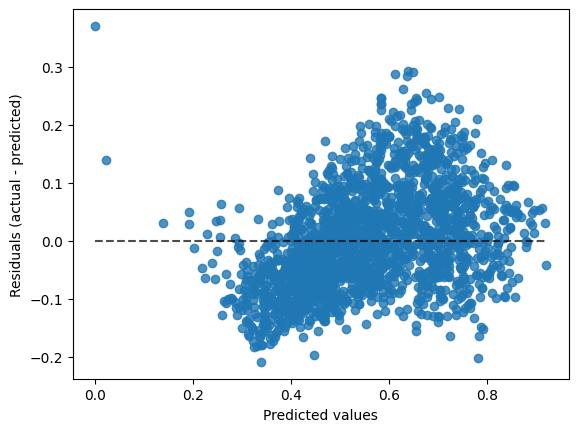

In [9]:
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt

display = PredictionErrorDisplay(y_true=Y_test, y_pred=Y_predicted)
display.plot()
plt.show()